In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
#from _________________________

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


# CAN YOU PERFORM DESCRIPTIVE STATISTICS AND VISUALISATIONS FOR THE VARIABLES IN THE DATASET?

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,1.56,0.497633,1.0,1.00,2.0,2.00,2.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

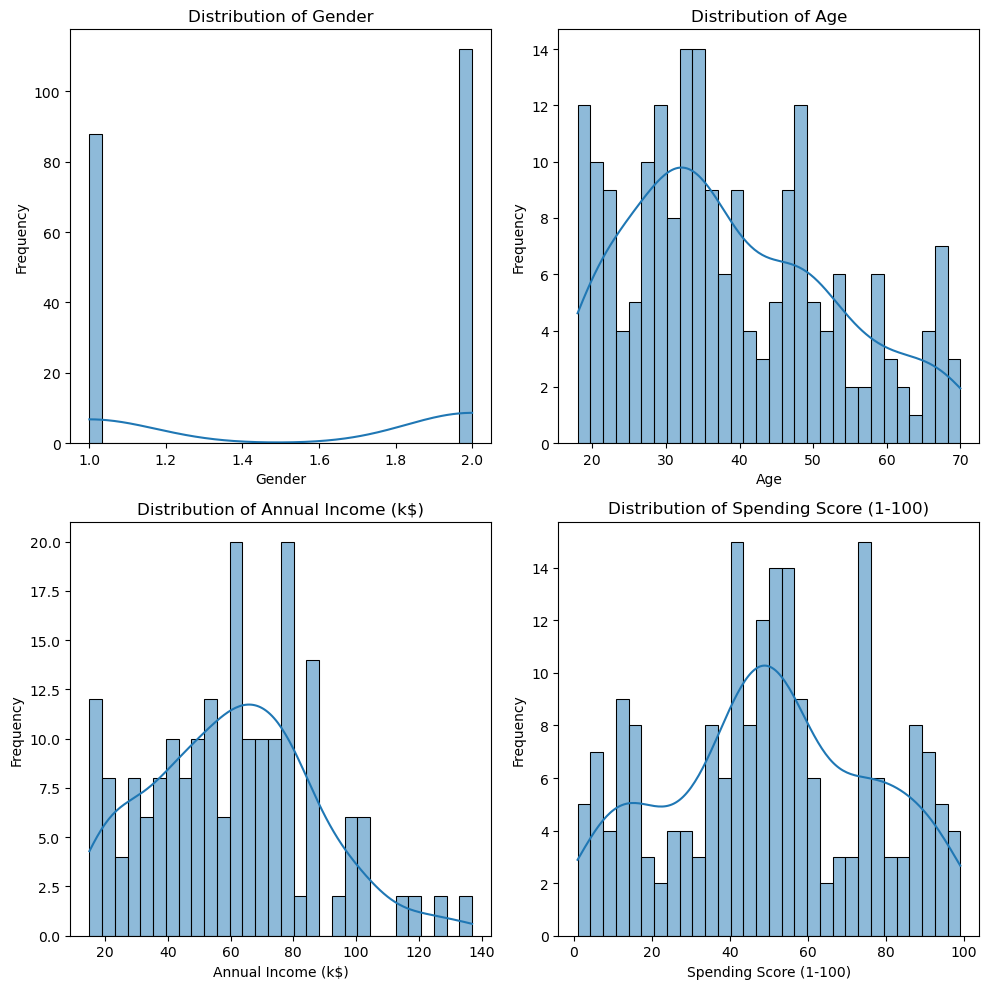

In [6]:
columns_to_plot  = ['Gender',
                    'Age',
                    'Annual Income (k$)',
                    'Spending Score (1-100)']

num_columns = 2
num_rows = 2

plt.figure(figsize=(10, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)  # Create subplots in a grid with 5 columns
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show all the subplots
plt.show()

## **Step 1: Determine number of clusters**

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

* wcss = []: This initializes an empty list called wcss (Within-Cluster Sum of Squares).
* for i in range(1, 11): This sets up a loop that iterates from 1 to 10. It will evaluate K-Means clustering for different values of K, ranging from 1 to 10 clusters.
* kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0): Within the loop, a K-Means clustering model is created for the current value of K (i.e., the number of clusters you're testing). The n_clusters parameter is set to i, which is the current value in the loop. Other parameters are also set:
* init='k-means++': This specifies the initialization method for the cluster centers, which is a smart way to initialize the centroids.
* max_iter=300: This sets the maximum number of iterations for each K-Means run.
* n_init=10: This specifies the number of times the K-Means algorithm will be run with different initializations. The best result (lowest WCSS) will be chosen.
* random_state=0: This sets the random seed for reproducibility.
* kmeans.fit(df): The K-Means model is fitted to the data in the DataFrame df.
* wcss.append(kmeans.inertia_): After fitting the K-Means model, the Within-Cluster Sum of Squares (WCSS) for the current value of K is computed and appended to the wcss list. WCSS is a measure of the sum of squared distances between data points and their assigned cluster centers. It's a measure of how well the data points are clustered within their respective clusters.
* After the loop completes, you have a list wcss containing the WCSS values for each tested value of K (from 1 to 10).


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

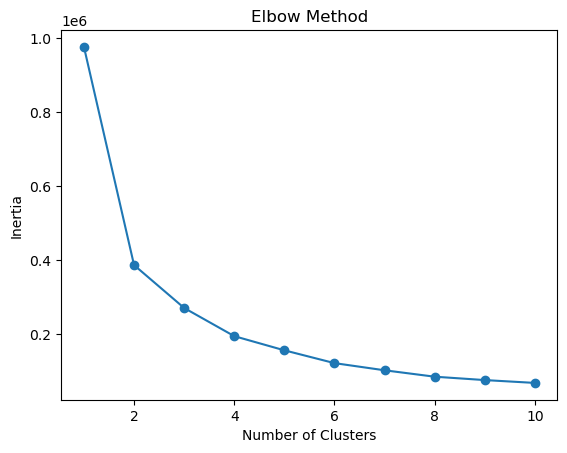

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_) #main function to determine the clusters i "inertia"

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# **Step 2: Apply kmeans clustering**

> Indented block


Once you've determined the optimal K (in this case, let's assume K=5 based on the elbow method), you can apply K-Means clustering.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [9]:
# Fit K-Means to the data with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Create separate dataframes for each cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(5)]


KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0): This line initializes a K-Means clustering model with the following parameters:

* n_clusters=5: Specifies that you want to create 5 clusters
* init='k-means++': Indicates that the algorithm should use the "k-means++" method to initialize cluster centroids, which is a smart initialization strategy.
* max_iter=300: Sets the maximum number of iterations for each run of the K-Means algorithm to 300.
* n_init=10: Specifies that the algorithm should be run 10 times with different initializations, and the best result (lowest WCSS) will be chosen.
* random_state=0: Sets a random seed for reproducibility.

**clusters = kmeans.fit_predict(df):** This line fits the K-Means model to the dataset df and assigns each data point to one of the 5 clusters. The resulting cluster assignments are stored in the clusters variable as an array where each element represents the cluster number to which the corresponding data point belongs.

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,2,20,16,6,4
3,4,2,23,16,77,1
4,5,2,31,17,40,4


In [11]:
df.to_csv('cluster_data.csv')

# **Step 3: Visualise the clusters**
You can now analyze and visualize the clusters, for example, by plotting them.

* **for i, cluster_df in enumerate(cluster_dataframes)**: This line starts a loop that iterates through the list cluster_dataframes, which contains separate DataFrames for each cluster. The enumerate() function is used to loop through the list and keep track of the index i (cluster number) and the corresponding DataFrame cluster_df.

* **plt.scatter(cluster_df['Age'], cluster_df['Annual Income (k$)']**, label=f'Cluster {i + 1}'):
Within the loop, this line creates a scatter plot for the data points within the current cluster (cluster_df) using the 'Age' column on the x-axis and the 'Annual Income (k$)' column on the y-axis.

* **cluster_df['Age']**: This selects the 'Age' column from the current cluster's DataFrame, representing the x-values of the scatter plot.

* **cluster_df['Annual Income (k$)']**: This selects the 'Annual Income (k$)' column from the current cluster's DataFrame, representing the y-values of the scatter plot.

* label=f'Cluster {i + 1}': This sets the label for the scatter plot for the current cluster. The label includes the cluster number (incremented by 1, as cluster numbering typically starts from 1) to identify which cluster the data points belong to.

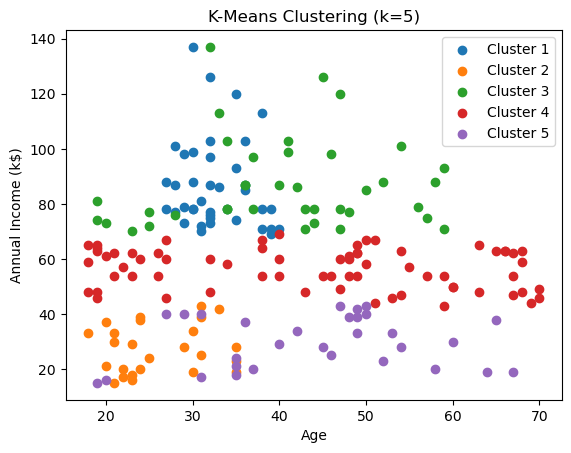

In [12]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Age'], cluster_df['Annual Income (k$)'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.show()

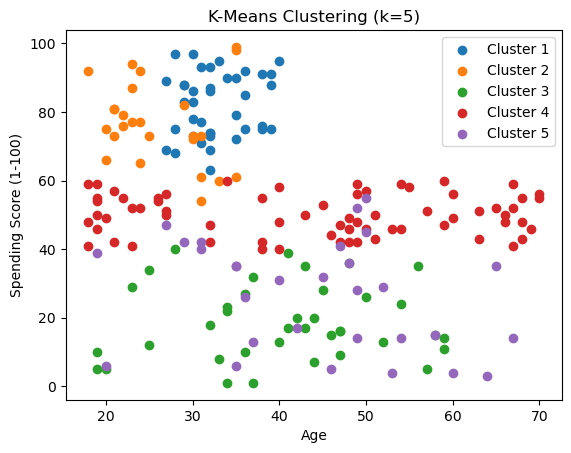

In [15]:
# Visualize the clusters FOR Age vs Spending Score
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Age'], cluster_df['Spending Score (1-100)'], label=f'Cluster {i + 1}')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.show()

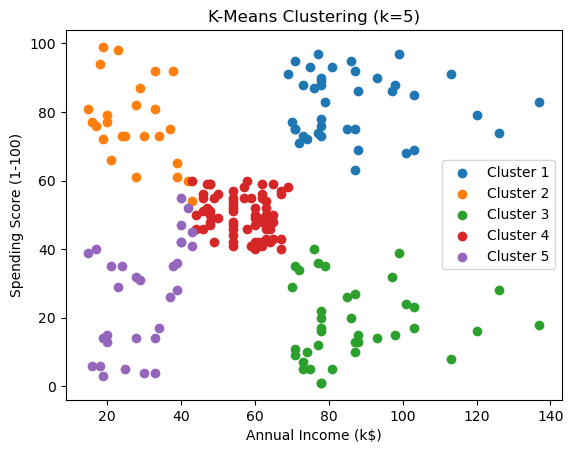

In [16]:
# Visualize the clusters FOR Age vs Spending Score
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Annual Income (k$)'], cluster_df['Spending Score (1-100)'], label=f'Cluster {i + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.show()

In [18]:
data = pd.read_csv('cluster_data.csv')
data

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,1,1,19,15,39,4
1,1,2,1,21,15,81,1
2,2,3,2,20,16,6,4
3,3,4,2,23,16,77,1
4,4,5,2,31,17,40,4
